In [1]:
import pandas as pd
import random

In [2]:
# Exemplo de dados fictícios
dataset = []

In [3]:
# Criando 500 entradas aleatórias no conjunto de dados
for i in range(1, 501):
    entrada = {
        "ID": i,
        "default": random.randint(0, 1),
        "Idade": random.randint(15, 70),
        "Renda Mensal": random.randint(1000, 20000),
        "Emprego": random.choice(["CLT", "Autônomo", "Desempregado"]),
        "Estado Civil": random.choice(["Solteiro", "Casado", "Divorciado", "Viúvo"]),
        "Sexo": random.choice(["Homem", "Mulher"]),
        "Valor do Emprestimo": random.randint(5000, 30000)
    }
    dataset.append(entrada)

In [4]:
# Criar DataFrame a partir do conjunto de dados
dados = pd.DataFrame(dataset)
dados

,ID,default,Idade,Renda Mensal,Emprego,Estado Civil,Sexo,Valor do Emprestimo
0,1,1,15,15442,Desempregado,Divorciado,Mulher,24429
1,2,1,30,3197,Desempregado,Solteiro,Homem,26484
2,3,1,66,16681,Autônomo,Casado,Mulher,11467
3,4,0,23,2845,Desempregado,Viúvo,Mulher,11337
4,5,1,50,3688,CLT,Casado,Mulher,18322
...,...,...,...,...,...,...,...,...
495,496,1,41,15578,Desempregado,Viúvo,Mulher,16845
496,497,1,64,19848,Autônomo,Viúvo,Mulher,8644
497,498,1,58,2273,Autônomo,Solteiro,Homem,9383
498,499,1,44,8233,Autônomo,Solteiro,Homem,16624


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   500 non-null    int64 
 1   default              500 non-null    int64 
 2   Idade                500 non-null    int64 
 3   Renda Mensal         500 non-null    int64 
 4   Emprego              500 non-null    object
 5   Estado Civil         500 non-null    object
 6   Sexo                 500 non-null    object
 7   Valor do Emprestimo  500 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 31.4+ KB


In [6]:
# object significa que é uma string
# int64 significa que é um numero

In [7]:
# Ver o tamanho da base:

In [8]:
linhas = dados.shape[0]
colunas = dados.shape[1]

print('A base de dados tem %s linhas e %s colunas.' %(linhas, colunas))

A base de dados tem 500 linhas e 8 colunas.


In [9]:
# Conferir se a base tem valore nulos ou duplicados

In [10]:
nulos = dados.isnull()
nulos.sum()

ID                     0
default                0
Idade                  0
Renda Mensal           0
Emprego                0
Estado Civil           0
Sexo                   0
Valor do Emprestimo    0
dtype: int64

In [11]:
#o primeiro passo para modelar é separar a nossa base de dados em duas.
#A primeira nós chamamos de X, que é a base de modelagem, e a segunda é a nossa variável resposta, que chamamos de Y.

In [12]:
y = dados['default']
y.head()

0    1
1    1
2    1
3    0
4    1
Name: default, dtype: int64

In [13]:
x = dados.drop(columns = 'default')
x.head()

,ID,Idade,Renda Mensal,Emprego,Estado Civil,Sexo,Valor do Emprestimo
0,1,15,15442,Desempregado,Divorciado,Mulher,24429
1,2,30,3197,Desempregado,Solteiro,Homem,26484
2,3,66,16681,Autônomo,Casado,Mulher,11467
3,4,23,2845,Desempregado,Viúvo,Mulher,11337
4,5,50,3688,CLT,Casado,Mulher,18322


In [14]:
dados.head()

,ID,default,Idade,Renda Mensal,Emprego,Estado Civil,Sexo,Valor do Emprestimo
0,1,1,15,15442,Desempregado,Divorciado,Mulher,24429
1,2,1,30,3197,Desempregado,Solteiro,Homem,26484
2,3,1,66,16681,Autônomo,Casado,Mulher,11467
3,4,0,23,2845,Desempregado,Viúvo,Mulher,11337
4,5,1,50,3688,CLT,Casado,Mulher,18322


In [15]:
dados['Emprego'].unique()

array(['Desempregado', 'Autônomo', 'CLT'], dtype=object)

In [16]:
a = {'CLT' : 1,
     'Autônomo' : 2,
     'Desempregado' : 3
}

dados['Emprego'] = dados['Emprego'].map(a)


In [17]:
dados['Estado Civil'].unique()

array(['Divorciado', 'Solteiro', 'Casado', 'Viúvo'], dtype=object)

In [18]:
b = {'Casado' : 1,
     'Solteiro' : 2,
     'Viúvo' : 3,
     'Divorciado' : 4
}

dados['Estado Civil'] = dados['Estado Civil'].map(b)

In [19]:
c = {'Mulher' : 1,
     'Homem' : 2
}

dados['Sexo'] = dados['Sexo'].map(c)

In [20]:
dados.head()

,ID,default,Idade,Renda Mensal,Emprego,Estado Civil,Sexo,Valor do Emprestimo
0,1,1,15,15442,3,4,1,24429
1,2,1,30,3197,3,2,2,26484
2,3,1,66,16681,2,1,1,11467
3,4,0,23,2845,3,3,1,11337
4,5,1,50,3688,1,1,1,18322


In [21]:
y = dados['default']
y.head()

0    1
1    1
2    1
3    0
4    1
Name: default, dtype: int64

In [22]:
x = dados.drop(columns = 'default')
x.head()

,ID,Idade,Renda Mensal,Emprego,Estado Civil,Sexo,Valor do Emprestimo
0,1,15,15442,3,4,1,24429
1,2,30,3197,3,2,2,26484
2,3,66,16681,2,1,1,11467
3,4,23,2845,3,3,1,11337
4,5,50,3688,1,1,1,18322


In [23]:
from sklearn.model_selection import train_test_split

SEED = 77
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.30, random_state = SEED)

base_treino = treino_x.shape[0]
base_teste = teste_x.shape[0]

print('A base de treino tem %s elementos e a base de teste tem %s elementos.' %(base_treino, base_teste))

A base de treino tem 350 elementos e a base de teste tem 150 elementos.


In [24]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(max_iter=1000)
modelo.fit(treino_x, treino_y)

LogisticRegression(max_iter=1000)

In [25]:
modelo = LogisticRegression(max_iter=1000)
modelo.fit(treino_x, treino_y)
print(modelo.score(treino_x, treino_y))

0.5485714285714286


In [26]:
previsoes = modelo.predict(teste_x)
previsoes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [27]:
from sklearn.metrics import accuracy_score

acuracia = accuracy_score(teste_y, previsoes)
acuracia = round(acuracia, 3)*100
acuracia

49.3

In [28]:
!pip install matplotlib-venn
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 44.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [29]:
import matplotlib.pyplot as plt

In [30]:
import numpy as np

In [31]:
from sklearn import metrics

In [32]:
predicao_y = modelo.predict(teste_x)

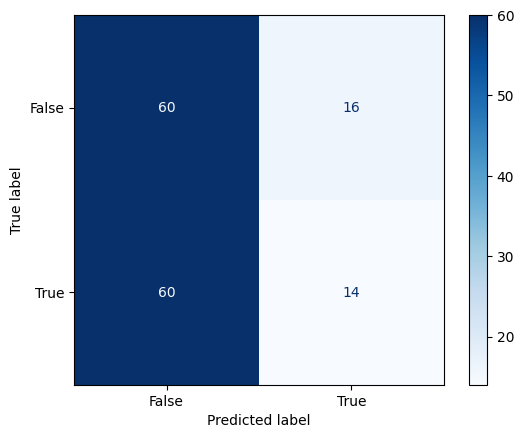

In [33]:
confusion_matrix = metrics.confusion_matrix(teste_y, predicao_y)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot(cmap='Blues')
plt.show()

In [34]:
from sklearn.metrics import classification_report

print(classification_report(teste_y, previsoes))

              precision    recall  f1-score   support

           0       0.50      0.79      0.61        76
           1       0.47      0.19      0.27        74

    accuracy                           0.49       150
   macro avg       0.48      0.49      0.44       150
weighted avg       0.48      0.49      0.44       150



In [35]:
from sklearn.metrics import roc_curve, roc_auc_score

roc_auc 0.4519914651493599


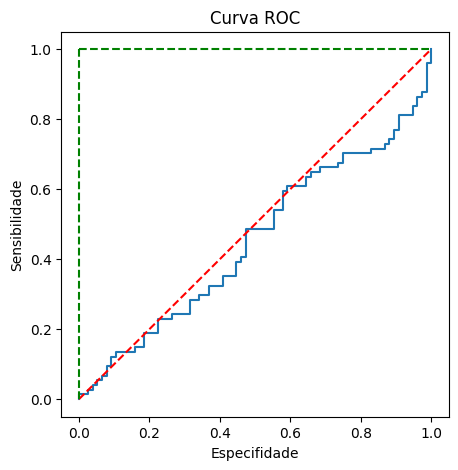

In [36]:
prob_previsao = modelo.predict_proba(teste_x)[:,1]

#tfp = taxa falsos positivos
#tvp = taxa verdadeiros positivos

tfp, tvp, limite = roc_curve(teste_y, prob_previsao)
print('roc_auc', roc_auc_score(teste_y, prob_previsao))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde
plt.show()

In [37]:
x

,ID,Idade,Renda Mensal,Emprego,Estado Civil,Sexo,Valor do Emprestimo
0,1,15,15442,3,4,1,24429
1,2,30,3197,3,2,2,26484
2,3,66,16681,2,1,1,11467
3,4,23,2845,3,3,1,11337
4,5,50,3688,1,1,1,18322
...,...,...,...,...,...,...,...
495,496,41,15578,3,3,1,16845
496,497,64,19848,2,3,1,8644
497,498,58,2273,2,2,2,9383
498,499,44,8233,2,2,2,16624


In [38]:
variaveis_analise = ['Idade', 'Renda Mensal', 'Valor do Emprestimo']
dados[variaveis_analise].describe()

,Idade,Renda Mensal,Valor do Emprestimo
count,500.00000,500.000000,500.000000
mean,42.90800,10968.870000,17005.558000
std,15.31341,5372.722145,7201.570007
min,15.00000,1082.000000,5047.000000
25%,30.00000,6468.250000,10697.500000
50%,43.50000,11042.000000,16684.500000
75%,56.00000,15586.000000,23295.750000
max,70.00000,19997.000000,29907.000000


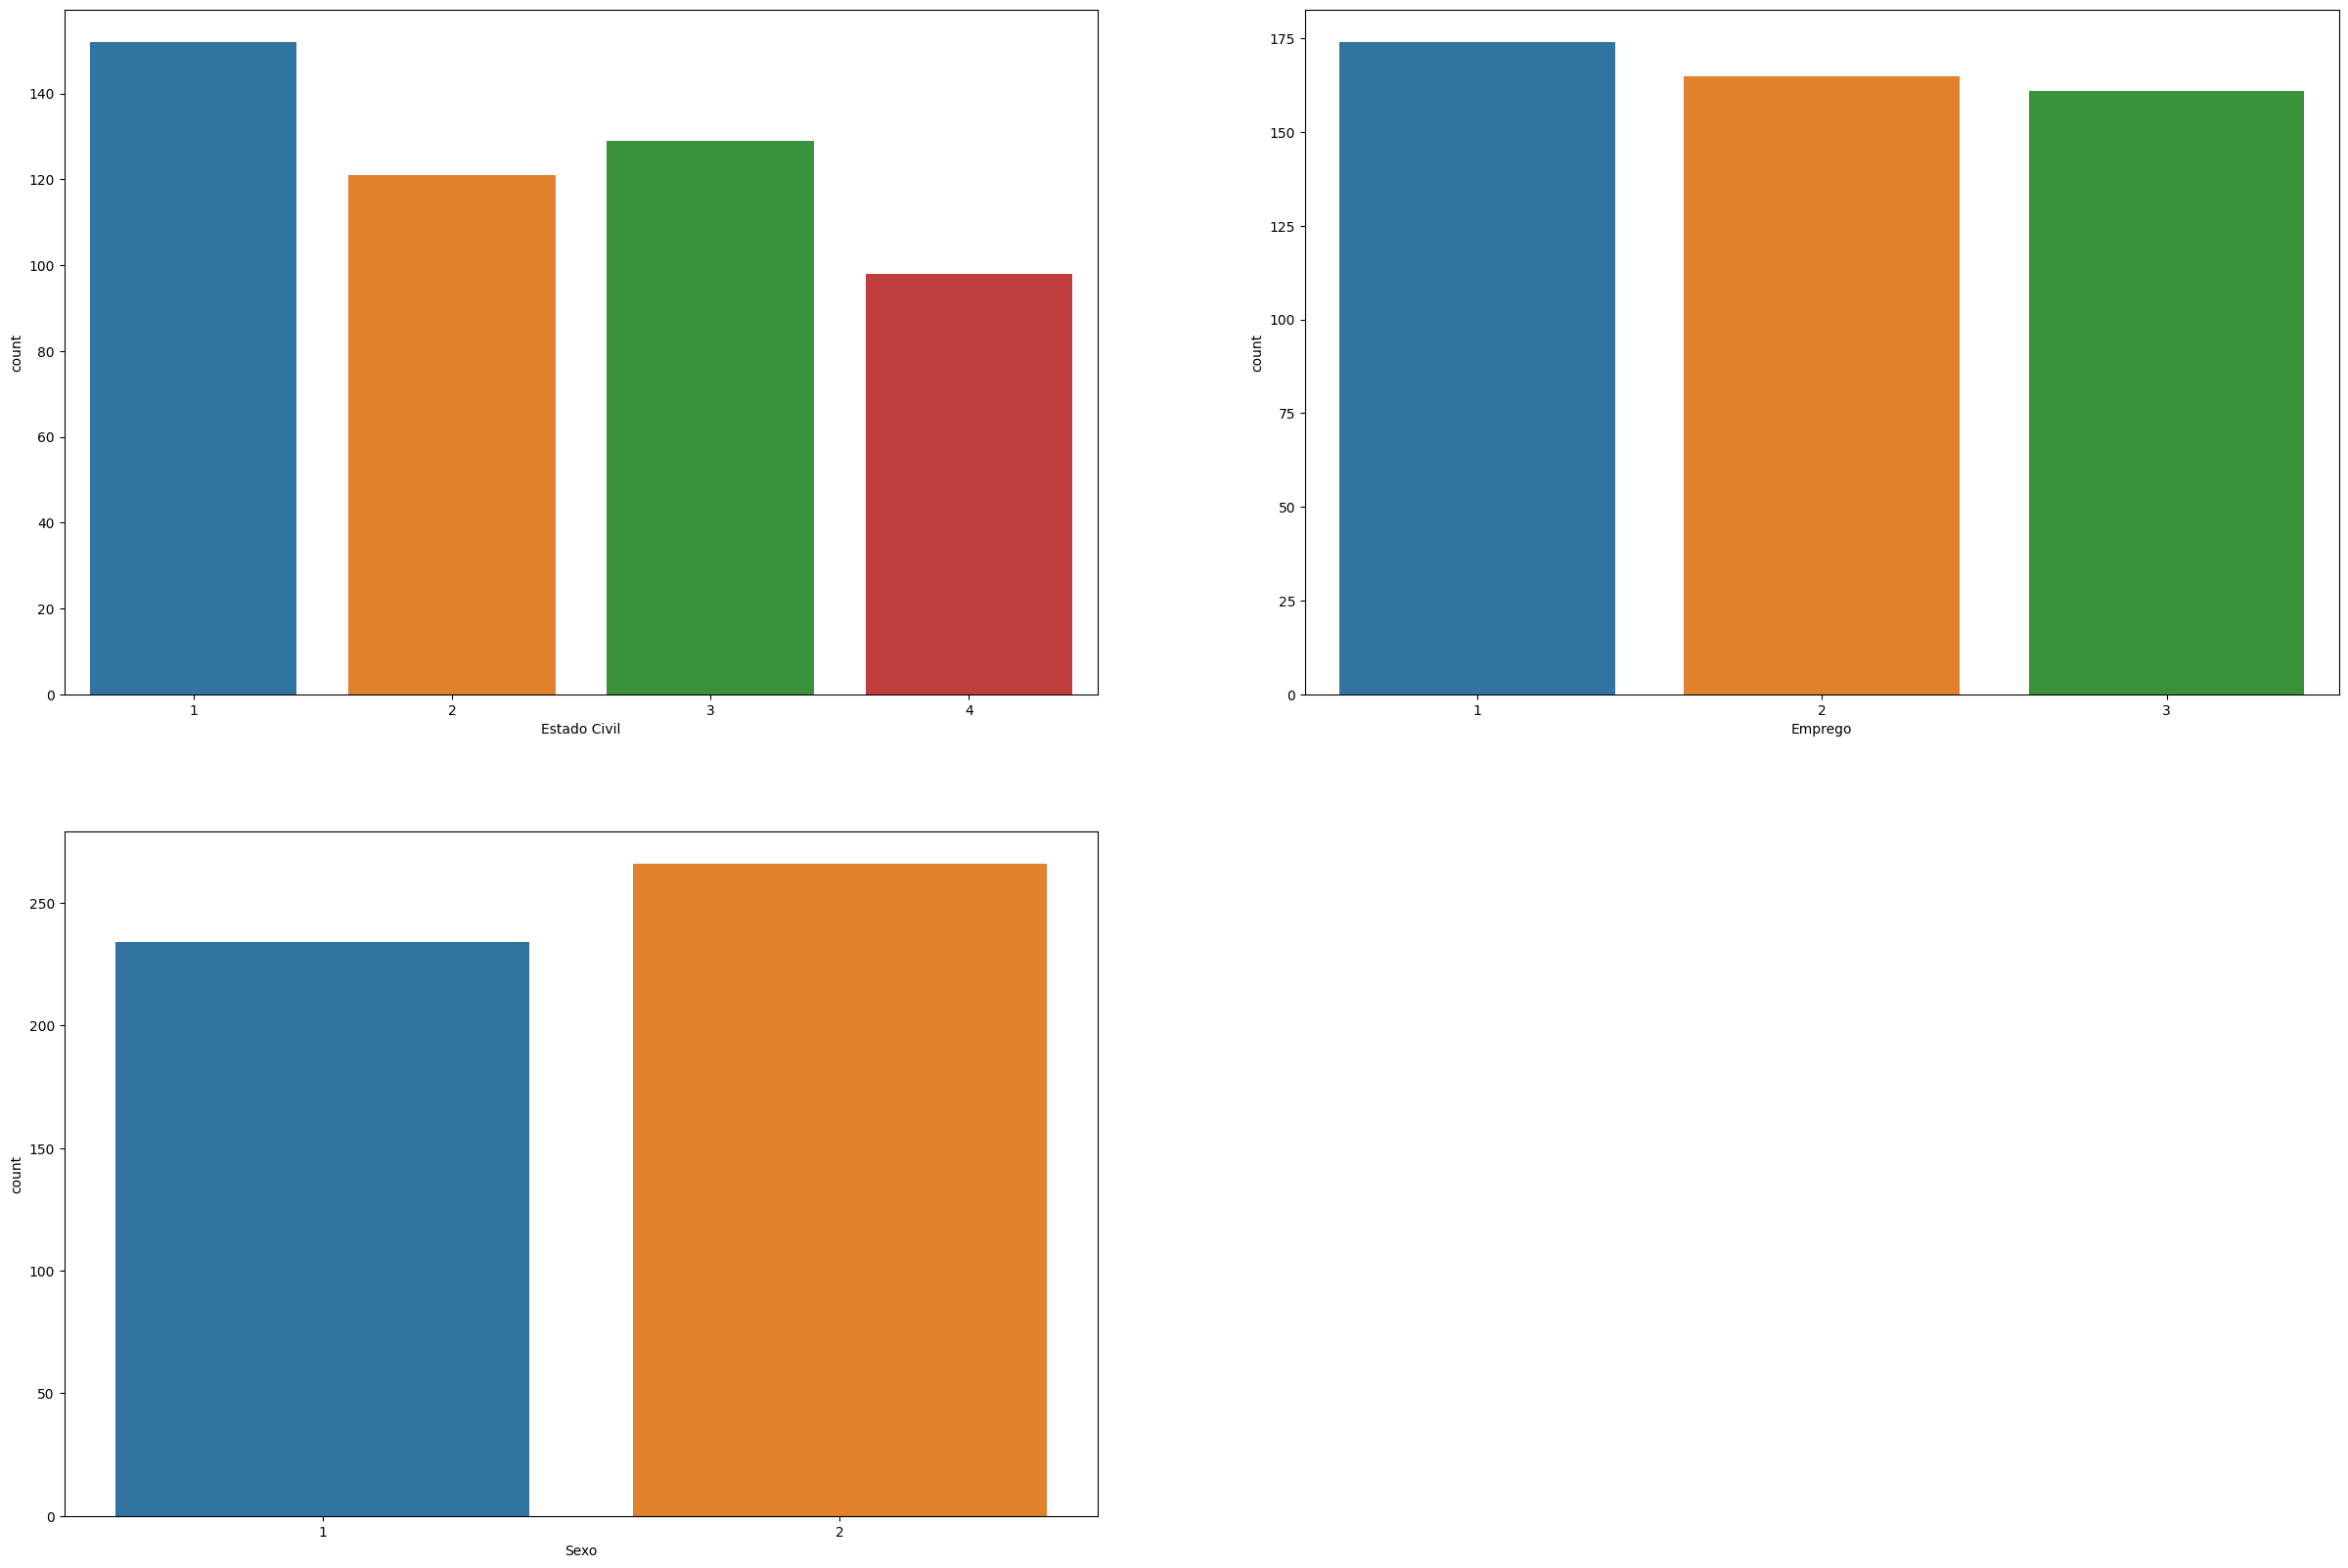

In [39]:
import seaborn as sns

histogramas = ['Estado Civil', 'Emprego', 'Sexo']

lista_histogramas = list(enumerate(histogramas))

plt.figure(figsize = (30,20))

for i in lista_histogramas:
    plt.subplot(2, 2, i[0]+1)
    sns.countplot(x = i[1], data = dados)

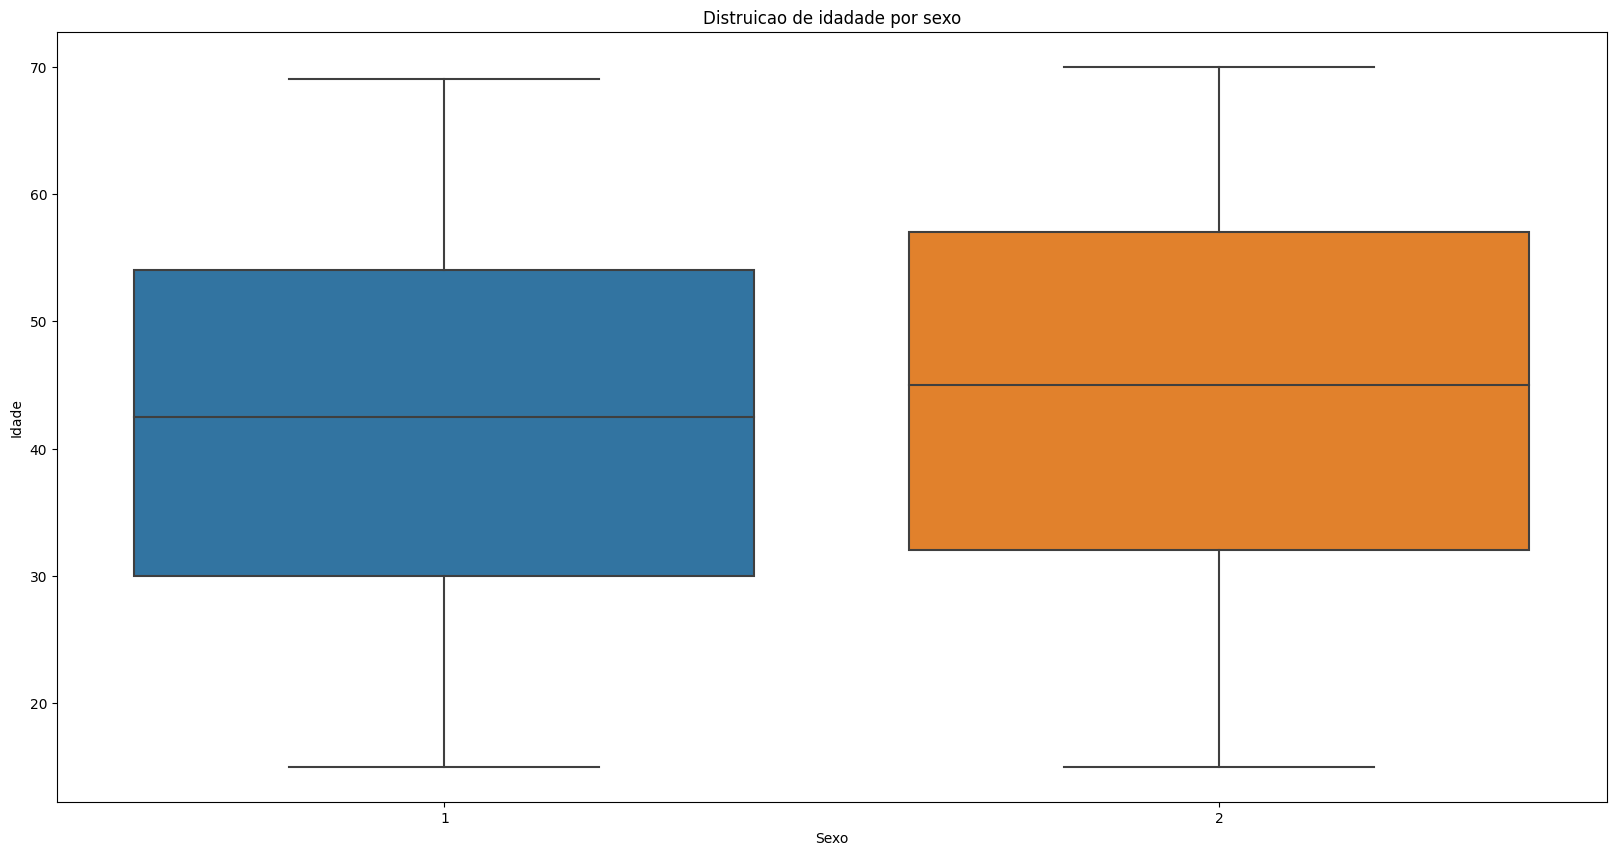

In [40]:
plt.figure(figsize = (20,10))

sns.boxplot(x = 'Sexo', y = 'Idade', data = dados)
plt.title('Distruicao de idadade por sexo')

plt.show()

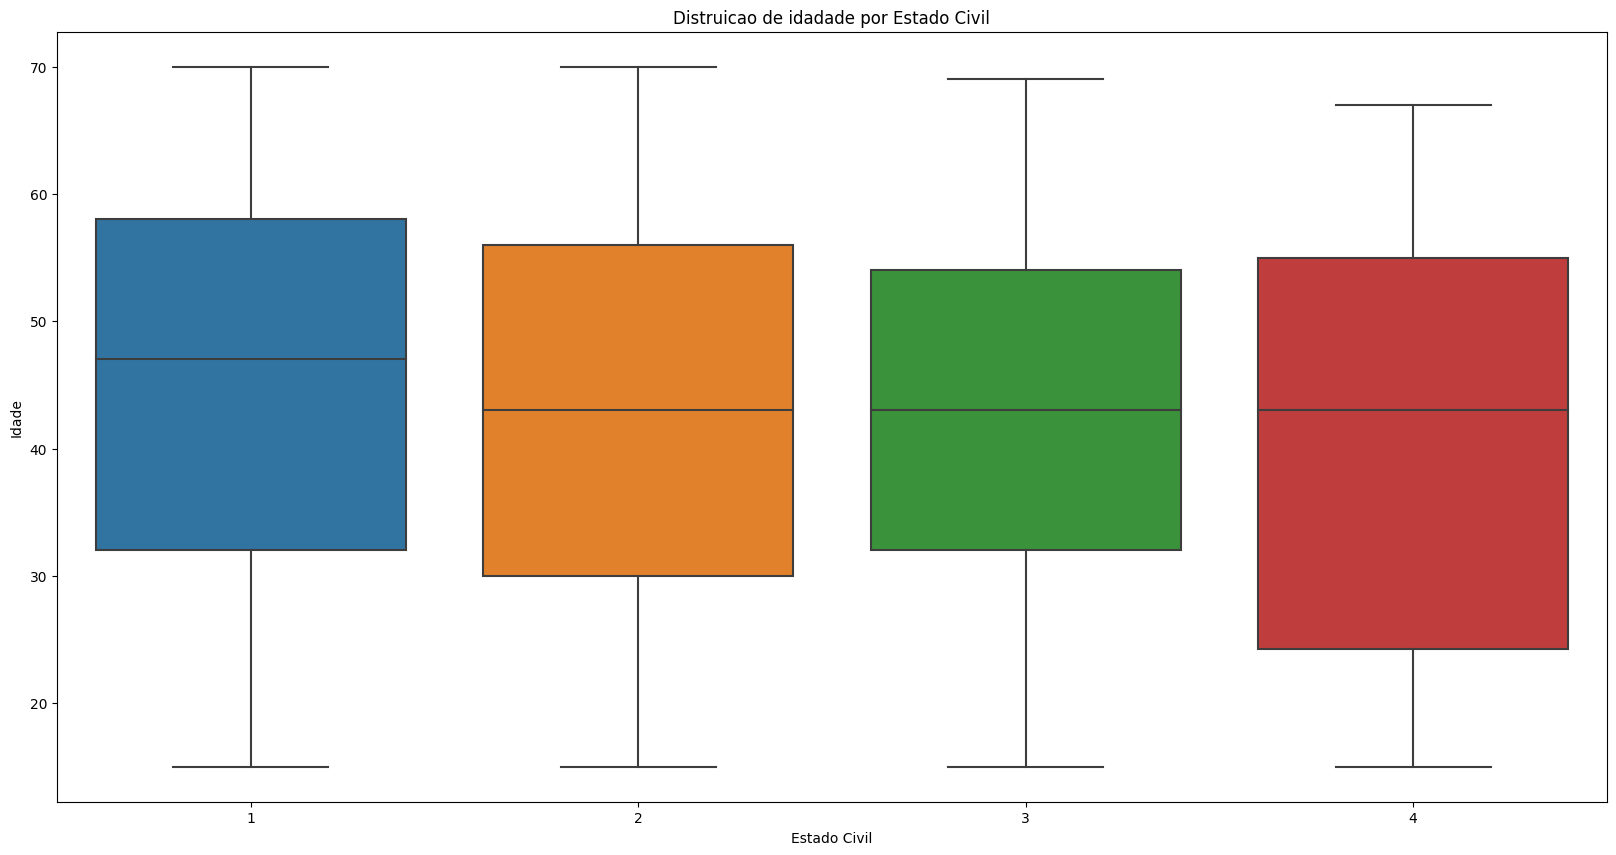

In [41]:
plt.figure(figsize = (20,10))

sns.boxplot(x = 'Estado Civil', y = 'Idade', data = dados)
plt.title('Distruicao de idadade por Estado Civil')

plt.show()

In [42]:
dados.head()

,ID,default,Idade,Renda Mensal,Emprego,Estado Civil,Sexo,Valor do Emprestimo
0,1,1,15,15442,3,4,1,24429
1,2,1,30,3197,3,2,2,26484
2,3,1,66,16681,2,1,1,11467
3,4,0,23,2845,3,3,1,11337
4,5,1,50,3688,1,1,1,18322


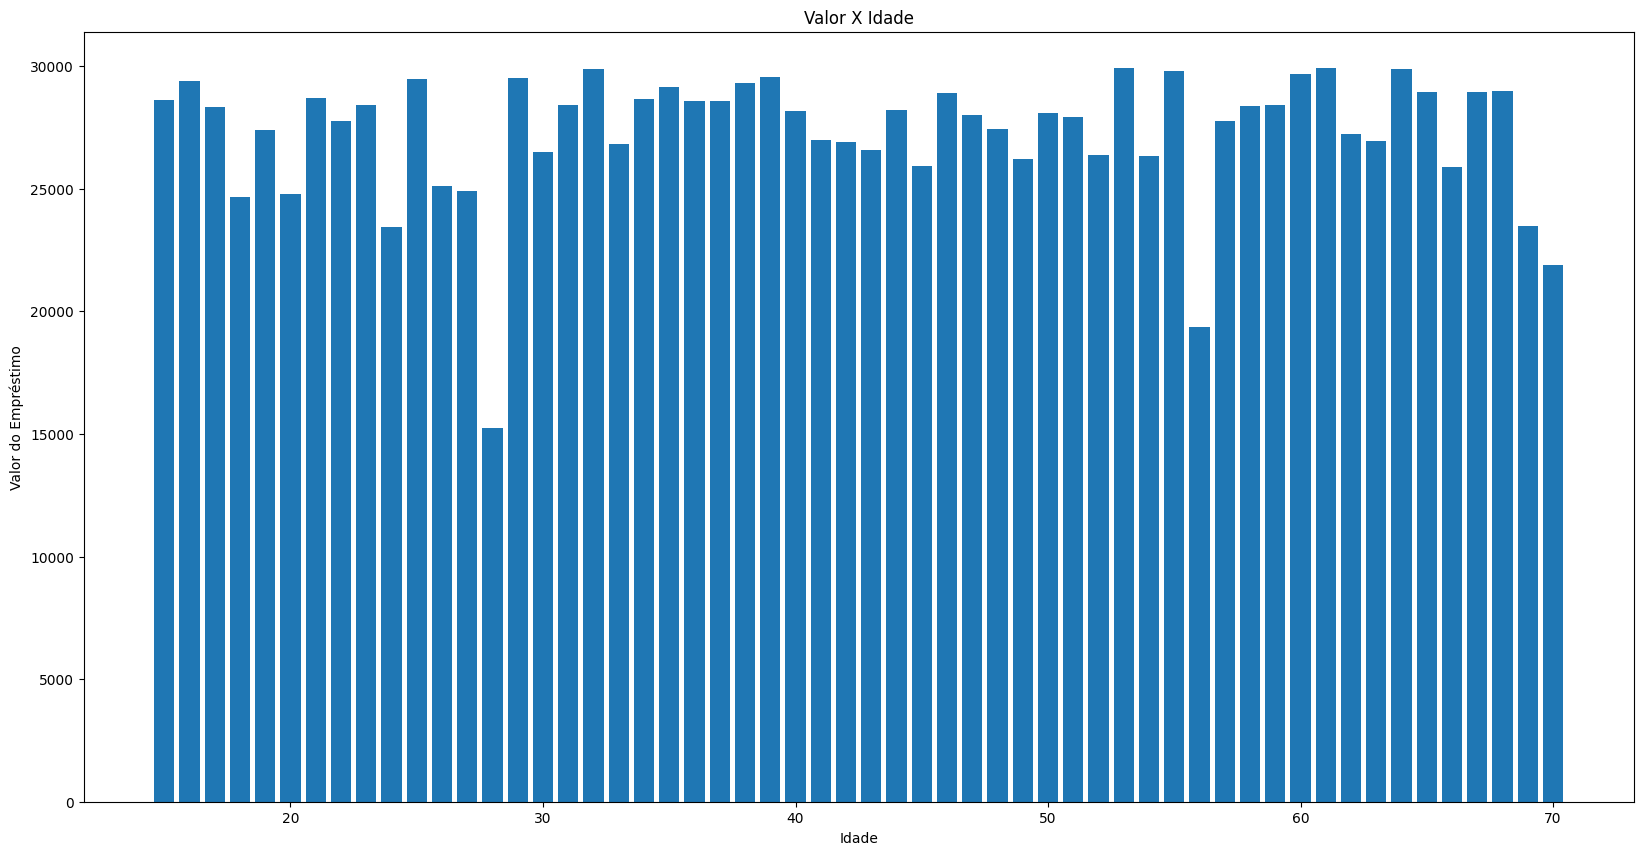

In [43]:
plt.figure(figsize = (20,10))

plt.bar(dados['Idade'] , dados['Valor do Emprestimo'])

plt.xlabel('Idade')
plt.ylabel('Valor do Empréstimo')
plt.title('Valor X Idade')

plt.show()

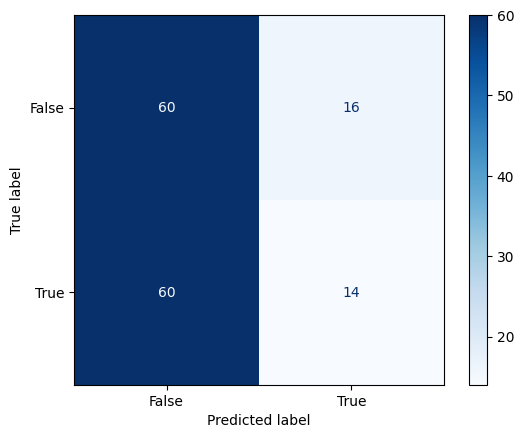

----------------------------------------------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.79      0.61        76
           1       0.47      0.19      0.27        74

    accuracy                           0.49       150
   macro avg       0.48      0.49      0.44       150
weighted avg       0.48      0.49      0.44       150

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
roc_auc 0.4519914651493599
----------------------------------------------------------------------------------------------------


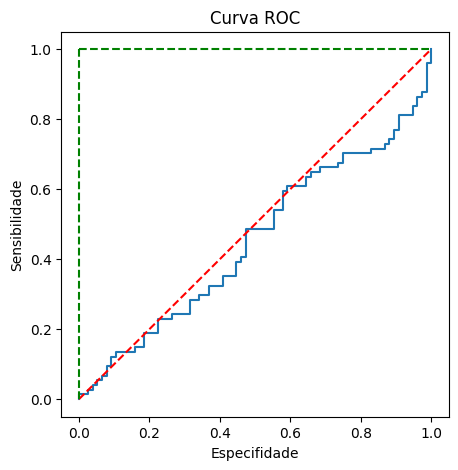

In [44]:
#funcao 'roda_modelo': ajuste a validacao

def roda_modelo(base_dados, classificador):

#separando a base de modelagem e variavel resposta

    y = base_dados['default']
    x = base_dados.drop(columns='default')

#separando a base de treino e teste

    SEED = 77
    treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.30, random_state = SEED)

    base_treino = treino_x.shape[0]
    base_teste = teste_x.shape[0]
    print('A base de treino tem %s elementos e a base de teste tem %s elementos.' %(base_treino, base_teste))
    print(100*'-')

#ajustamdo modelo com base de teste

    modelo = classificador
    modelo.fit(treino_x, treino_y)

#-------------------------------------------------------------------------------------------------------------------------------------

#matriz de confusao

import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
predicao_y = modelo.predict(teste_x)
matriz_confusao = metrics.confusion_matrix(teste_y, predicao_y)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot(cmap='Blues')
plt.show()
print(100*'-')

#classification report

from sklearn.metrics import classification_report

print('\nClassification Report:')
print(classification_report(teste_y, previsoes))
print(100*'-')


#curva ROC  e AUC

print(100*'-')
prob_previsao = modelo.predict_proba(teste_x)[:,1]

#tfp = taxa falsos positivos
#tvp = taxa verdadeiros positivos

tfp, tvp, limite = roc_curve(teste_y, prob_previsao)
print('roc_auc', roc_auc_score(teste_y, prob_previsao))
print(100*'-')

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde
plt.show()

In [45]:
#criando 'faixa_idade' para variavel 'idade'

## 16 - 30 = 1
## 31 - 40 = 2
## 41 - 50 = 3
## 51 - 60 = 4
## 61 - 70 = 5
## 71 - 80 = 6

dados['faixa_idade'] = pd.cut(x = dados['Idade'], bins=[14, 30, 40, 50, 60, 70, 80], labels = [1, 2, 3, 4, 5, 6])
dados.head()

,ID,default,Idade,Renda Mensal,Emprego,Estado Civil,Sexo,Valor do Emprestimo,faixa_idade
0,1,1,15,15442,3,4,1,24429,1
1,2,1,30,3197,3,2,2,26484,1
2,3,1,66,16681,2,1,1,11467,5
3,4,0,23,2845,3,3,1,11337,1
4,5,1,50,3688,1,1,1,18322,3


In [46]:
#criando 'faixa_valor_emprestimo' para variavel 'valor_emprestimo'

## 1 - 1000 = 1
## 1001 - 2000 = 2
## 2001 - 3000 = 3
## 3001 - 4000 = 4
## 4001 - 5000 = 5
## 5001 - 6000 = 6
## 6001 - 7000 = 7
## 7001 - 8000 = 8
## 8001 - 9000 = 9
## 9001 - 10000 = 10
## 10001 - 11000 = 11
## 11001 - 12000 = 12
## 12001 - 13000 = 13
## 13001 - 14000 = 14
## 14001 - 15000 = 15
## 15001 - 16000 = 16
## 16001 - 17000 = 17
## 17001 - 18000 = 18
## 18001 - 19000 = 19
## 19001 - 20000 = 20

dados['faixa_valor_emprestimo'] = pd.cut(x = dados['Valor do Emprestimo'], bins=[1, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000],
                                         labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
dados.head(10)

,ID,default,Idade,Renda Mensal,Emprego,Estado Civil,Sexo,Valor do Emprestimo,faixa_idade,faixa_valor_emprestimo
0,1,1,15,15442,3,4,1,24429,1,NaN
1,2,1,30,3197,3,2,2,26484,1,NaN
2,3,1,66,16681,2,1,1,11467,5,12
3,4,0,23,2845,3,3,1,11337,1,12
4,5,1,50,3688,1,1,1,18322,3,19
5,6,0,54,16883,2,4,2,7368,4,8
6,7,1,32,8706,1,3,1,19850,2,20
7,8,1,57,10320,2,3,2,27765,4,NaN
8,9,0,33,17435,3,1,1,26831,2,NaN
9,10,0,24,6078,3,3,2,16541,1,17


In [47]:
#funcao para retirar colunas da base de dados

colunas_retiradas = ['Sexo', 'Idade', 'Valor do Emprestimo']
base_dados = dados.drop(columns=colunas_retiradas)
base_dados.head()

,ID,default,Renda Mensal,Emprego,Estado Civil,faixa_idade,faixa_valor_emprestimo
0,1,1,15442,3,4,1,NaN
1,2,1,3197,3,2,1,NaN
2,3,1,16681,2,1,5,12
3,4,0,2845,3,3,1,12
4,5,1,3688,1,1,3,19


In [48]:
roda_modelo(base_dados, LogisticRegression(max_iter=1000))

A base de treino tem 350 elementos e a base de teste tem 150 elementos.
----------------------------------------------------------------------------------------------------
